# Evaluating Random Forest Performance
評估隨機森林表現¶
Estimated time needed: 30 minutes
預計所需時間： 30 分鐘

Objectives  目標¶
After completing this lab, you will be able to:
完成本實驗後，您將能夠：

Implement and evaluate the performance of random forest regression models on real-world data
實作並評估隨機森林迴歸模型在真實資料上的表現
Interpret various evaluation metrics and visualizations
解釋各種評估指標和視覺化
Describe the feature importances for a regression model
描述迴歸模型的特徵重要性

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

In [6]:
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [7]:
df = pd.DataFrame(X_train, columns=data.feature_names)
df['MedHouseVal'] = y_train
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## How are the median house prices distributed?

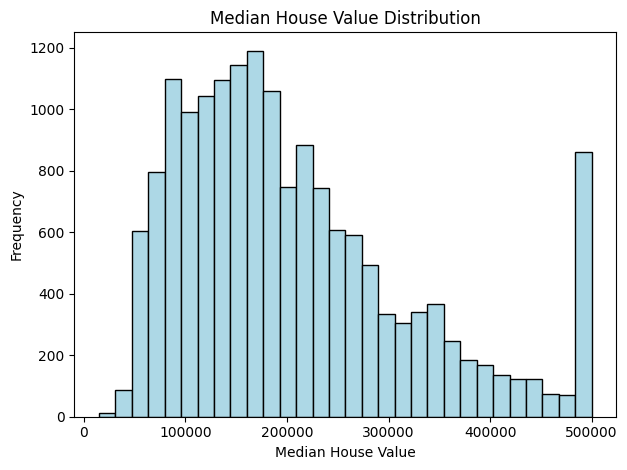

In [8]:
plt.figure()
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Model fitting and prediction

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
yPred = rf.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, yPred)
mse = mean_squared_error(y_test, yPred)
rmse = root_mean_squared_error(y_test, yPred)
r2 = r2_score(y_test, yPred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3275
Mean Squared Error (MSE): 0.2554
Root Mean Squared Error (RMSE): 0.5053
R² Score: 0.8051


## Plot actual vs Predicted values

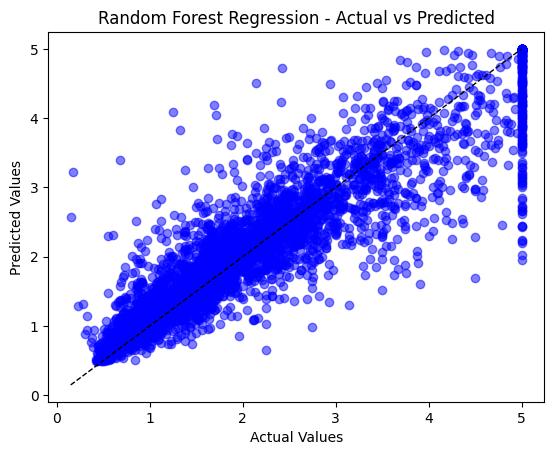

In [14]:
plt.scatter(y_test, yPred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

(array([   5.,    7.,   39.,  232., 2091., 1410.,  239.,   68.,   28.,
           9.]),
 array([-3.04584100e+00, -2.43690692e+00, -1.82797284e+00, -1.21903876e+00,
        -6.10104680e-01, -1.17060000e-03,  6.07763480e-01,  1.21669756e+00,
         1.82563164e+00,  2.43456572e+00,  3.04349980e+00]),
 <BarContainer object of 10 artists>)

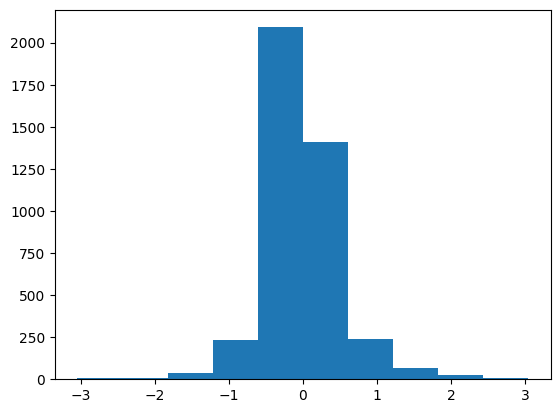

In [15]:
residuals = (y_test - yPred)
plt.hist(residuals)

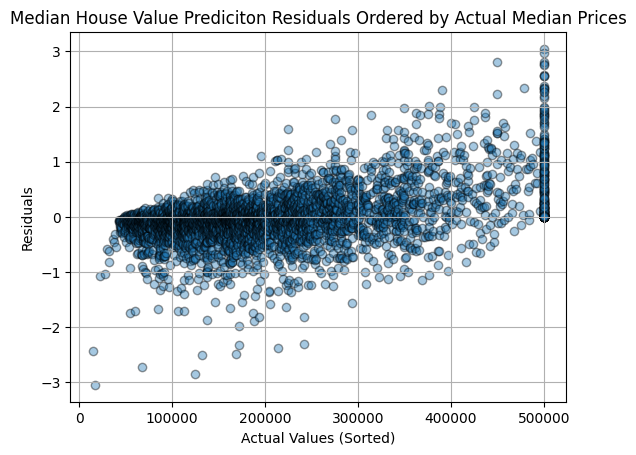

In [16]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

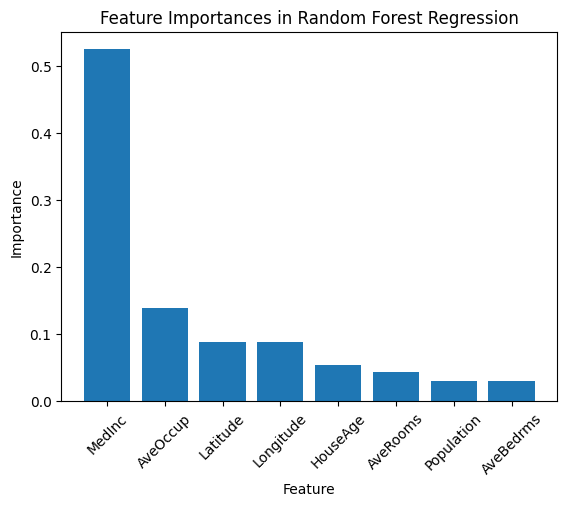

In [18]:
# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()